# Projeto 4: Estatística com Python - Probabilidade, Amostragem e Testes de Hipóteses

## Objetivo do Projeto:

O objetivo deste projeto é aplicar os conceitos aprendidos sobre Estatística Descritiva, Probabilidade, Amostragem e Testes de Hipóteses.

O projeto irá avaliar a compreensão dos tópicos abordados e como conseguem aplicar as ferramentas estatísticas para realizar uma análise real usando dados.

## Cenário:

A base de dados para esse projeto será a "Telco Customer Churn",disponível no Kaggle,  que contém dados sobre a rotatividade de clientes de uma empresa de telecomunicações.

A análise desse dataset é interessante, pois permite explorar a jornada do cliente, entender o comportamento daqueles que deixam a empresa e realizar testes de hipóteses para identificar os fatores que influenciam essa decisão.

link do dataset -[ Telco Customer Churn](
  https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3)

### Preparando o Ambiente

In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# direciona para o caminho desejado
%cd /content/drive/MyDrive/PRETALAB/Estatística/Projeto_4/

/content/drive/MyDrive/PRETALAB/Projeto 4


In [ ]:
#Este módulo fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional
import os

# os.getcwd() retorna o caminho absoluto do diretório de trabalho atual
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Projeto 4


In [ ]:
# Mostra o conteudo do local/pasta
!ls

'Carolyne Santos de Oliveira - Projeto4.ipynb'	 telco.csv


**Instalando as Bibliotecas**

In [ ]:
import kagglehub
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Atualizar o kagglehub
!pip install --upgrade kagglehub

**Forma de baixar a base**

In [ ]:
# Download do dataset "Telco Customer Churn" a partir do Kaggle
path = kagglehub.dataset_download("alfathterry/telco-customer-churn-11-1-3")

#  Mostrar o caminho do dataset
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1


- (Explicação ChatGPT = Este comando faz o download do dataset "Telco Customer Churn" a partir do Kaggle. A função dataset_download() recebe como argumento uma string que contém o nome do dataset disponível no Kaggle (neste caso, "alfathterry/telco-customer-churn-11-1-3") e baixa o dataset para uma pasta no seu sistema de arquivos.

"alfathterry/telco-customer-churn-11-1-3": É o identificador do dataset no Kaggle. Aqui, "alfathterry" é o nome do usuário que fez o upload do dataset, e "telco-customer-churn-11-1-3" é o nome específico do dataset.)

In [ ]:
#Outra forma de fazer, segundo o ChatGPT:
## Baixar a versão mais recente
# path = kagglehub.dataset_download("USUÁRIO/NOME DO DATASET")

# print("Caminho para os arquivos do conjunto de dados:", path)

In [ ]:
# Listar todos os arquivos do dataset (esse é o arquivo que devo baixar)
!ls /root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1

telco.csv


Agora que fiz o download do dataset do usuario '*alfathterry*' consegui verificar os arquivos existentes nesse dataset através do comando !ls posso fazer o carregamento do ou dos arquivos que preciso.

In [ ]:
# Carregar os dados
df = pd.read_csv('/root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1/telco.csv')

## Instruções do Projeto:

### Conceitos Básicos de Estatística em Python - Estatística Descritiva

Nesta primeira etapa, você irá realizar uma análise descritiva dos dados. Escolha algumas colunas que representam variáveis importantes para o negócio *(por exemplo, churn, tenure, monthly charges)* e responda às seguintes perguntas:

***Distribuição dos dados:***

1. Qual é a média, mediana, moda e desvio padrão do tempo de permanência (tenure) dos clientes?

***Análise de dispersão:***

2. Quais são os quartis e percentis do valor das cobranças mensais (monthly charges) e das taxas de rescisão (churn)?


***Visualização:***

3. Utilize gráficos como histograma e boxplot para visualizar a distribuição dos dados.

### Probabilidade, Amostragem e Testes de Hipóteses

Agora que você já realizou uma análise descritiva, vamos nos aprofundar em probabilidade, amostragem e testes de hipóteses.

***Amostragem:***

1. Escolha uma amostra aleatória de 30% dos dados.

Tipos de Amostragem: Utilize amostragem aleatória simples e estratificada para escolher as amostras, explicando as diferenças entre elas.

***Probabilidade:***

2. Calcule a probabilidade de um cliente encerrar o serviço (churn) com base em características como tempo de permanência (tenure) e cobranças mensais (monthly charges).

***Testes de Hipóteses:***

1. Escolha duas variáveis relevantes (por exemplo, churn e tipo de contrato) e formule uma hipótese nula (H0) e uma hipótese alternativa (H1).

2. Realize um Teste T ou ANOVA para verificar se há diferença significativa nas cobranças mensais entre clientes que cancelam o serviço e aqueles que não cancelam.

3. Analise o valor-p e interprete os resultados.

## O que entregar:

1. Um notebook com a análise completa.

2. A análise descritiva dos dados.

3. A aplicação da amostragem e cálculo de probabilidade.

4. O resultado dos testes de hipóteses com a interpretação crítica.

## Estatística Descritiva

- Distribuição dos dados:

In [ ]:
# Visualizar a base de dados:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [ ]:
# Visualizar a análise descritivas das colunas numéricas
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [ ]:
# Visualizar informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

1. Qual é a média, mediana, moda e desvio padrão do tempo de permanência (tenure) dos clientes?

In [ ]:
# Média
media = np.mean(df['Tenure in Months'])
print(f'A média do tempo de permanência dos clientes é de {media:.2f} meses.')

A média do tempo de permanência dos clientes é de 32.39 meses.


In [ ]:
# Mediana
mediana = np.median(df['Tenure in Months'])
print(f'A mediana do tempo de permanência dos clientes é de {mediana:.0f} meses.')

A mediana do tempo de permanência dos clientes é de 29 meses.


In [ ]:
# Moda
moda = stats.mode(df['Tenure in Months'])
print(f'A moda do tempo de permanência dos clientes é de {moda.mode:.0f} mês.')

A moda do tempo de permanência dos clientes é de 1 mês.


In [ ]:
# Desvio Padrão
desvio_padrao = np.std(df['Tenure in Months'])
print(f'O desvio padrão do tempo de permanência dos clientes é de {desvio_padrao:.2f} meses.')


O desvio padrão do tempo de permanência dos clientes é de 24.54 meses.


2. Quais são os quartis e percentis do valor das cobranças mensais (monthly charges) e das taxas de rescisão (churn)?

- '**Monthly Charges**'

In [ ]:
# Cálculo dos quartis
quartis = df['Monthly Charge'].quantile([0.25, 0.5, 0.75])
print(f'Os quartis da coluna "Monthly Charges" são: {quartis}')

Os quartis da coluna "Monthly Charges" são: 0.25    35.50
0.50    70.35
0.75    89.85
Name: Monthly Charge, dtype: float64


In [ ]:
# Cálculo dos Quartis coluna 'Monthly Charges'
primeiro_quartil = np.percentile(df['Monthly Charge'], 25)
segundo_quartil = np.percentile(df['Monthly Charge'], 50) #mediana
terceiro_quartil = np.percentile(df['Monthly Charge'], 75)

print(f"Primeiro quartil (25%): {primeiro_quartil}")
print(f"Segundo quartil (50%): {segundo_quartil}")
print(f"Terceiro quartil (75%): {terceiro_quartil}")

Primeiro quartil (25%): 35.5
Segundo quartil (50%): 70.35
Terceiro quartil (75%): 89.85


In [ ]:
# Percentil coluna 'Monthly Charges'
percentil_25 = np.percentile(df['Monthly Charge'], 25)
percentil_50 = np.percentile(df['Monthly Charge'], 50) #
percentil_75 = np.percentile(df['Monthly Charge'], 75)

print(f"O valor do percentil 25 é: {percentil_25}")
print(f"O valor do percentil 50 é: {percentil_50}")
print(f"O valor do percentil 75 é: {percentil_75}")

O valor do percentil 25 é: 35.5
O valor do percentil 50 é: 70.35
O valor do percentil 75 é: 89.85


- '**Churn Score**'

In [ ]:
# Cálculo dos quartis
quartis = df['Churn Score'].quantile([0.25, 0.5, 0.75])
print(f'Os quartis da coluna "Monthly Charges" são: {quartis}')

Os quartis da coluna "Monthly Charges" são: 0.25    40.0
0.50    61.0
0.75    75.5
Name: Churn Score, dtype: float64


In [ ]:
# Cálculo dos Quartis coluna 'Churn Score'
primeiro_quartil = np.percentile(df['Churn Score'], 25)
segundo_quartil = np.percentile(df['Churn Score'], 50) #mediana
terceiro_quartil = np.percentile(df['Churn Score'], 75)

print(f"Primeiro quartil (25%): {primeiro_quartil}")
print(f"Segundo quartil (50%): {segundo_quartil}")
print(f"Terceiro quartil (75%): {terceiro_quartil}")

Primeiro quartil (25%): 40.0
Segundo quartil (50%): 61.0
Terceiro quartil (75%): 75.5


In [ ]:
# Percentil coluna 'Churn Score'
percentil_25 = np.percentile(df['Churn Score'], 25)
percentil_50 = np.percentile(df['Churn Score'], 50)
percentil_75 = np.percentile(df['Churn Score'], 75)

print(f"O valor do percentil 25 é: {percentil_25}")
print(f"O valor do percentil 50 é: {percentil_50}")
print(f"O valor do percentil 75 é: {percentil_75}")

O valor do percentil 25 é: 40.0
O valor do percentil 50 é: 61.0
O valor do percentil 75 é: 75.5


3. Utilize gráficos como histograma e boxplot para visualizar a distribuição dos dados.

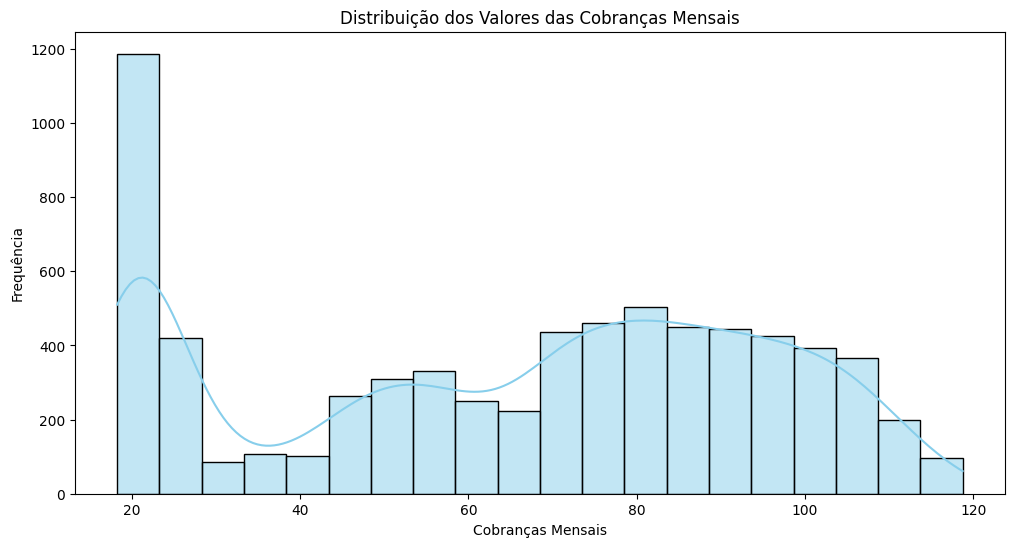

In [ ]:
# Visualizações Histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['Monthly Charge'], kde=True, bins=20, color='skyblue')
plt.title('Distribuição dos Valores das Cobranças Mensais')
plt.xlabel('Cobranças Mensais')
plt.ylabel('Frequência')
plt.show()

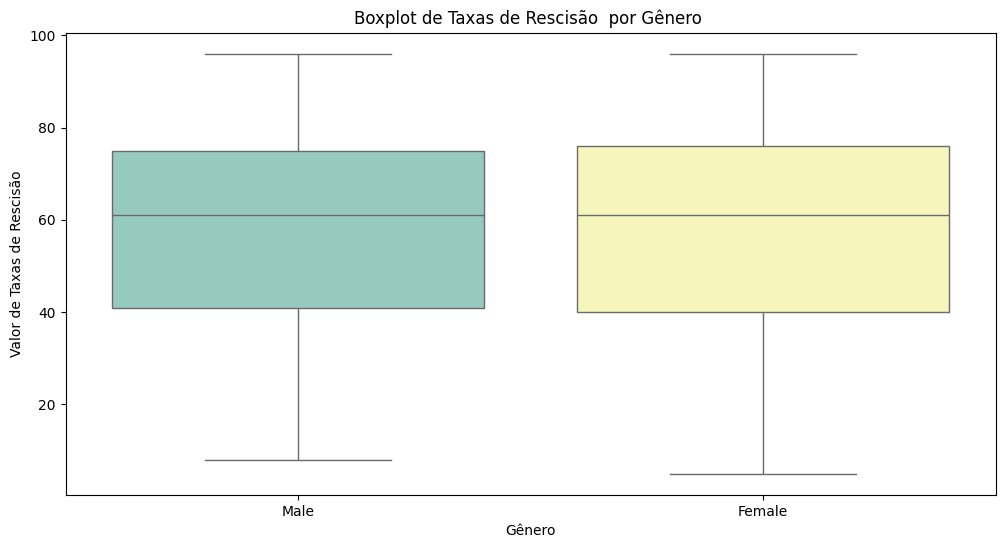

In [ ]:
# Boxplot dos valores de taxas de rescisão por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Churn Score', data=df, palette='Set3', hue='Gender')
plt.title('Boxplot de Taxas de Rescisão  por Gênero ')
plt.xlabel('Gênero')
plt.ylabel('Valor de Taxas de Rescisão')
plt.show()

## Probabilidade, Amostragem e Testes de Hipóteses

#### **- Amostragem:**

1. Escolha uma amostra aleatória de 30% dos dados.
Tipos de Amostragem: Utilize amostragem aleatória simples e estratificada para escolher as amostras, explicando as diferenças entre elas.

In [ ]:
# Cálculo de 30% de 7043
valor = 7043
percentual = 30 / 100  # 30% em formato decimal
resultado = round(valor * percentual)

print(f"Trinta por cento (30%) de {valor} é {resultado}")

Trinta por cento (30%) de 7043 é 2113


- Amostragem Simples:
Seleciona 2113 clientes de forma completamente aleatória de todo o DataFrame df, sem considerar a distribuição de qualquer variável, como gênero ou qualquer outra categoria.

In [ ]:
# Amostra aleatória simples de 2113 clientes
amostra_aleatoria_simples = df.sample(n=2113, random_state=0)

In [ ]:
print("Exemplo de Amostra Aleatória Simples:")
print(amostra_aleatoria_simples.head())

Exemplo de Amostra Aleatória Simples:
     Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
2200  0843-WTBXE    Male   38       No             No      No         No   
4627  6734-JDTTV    Male   55       No             No     Yes        Yes   
3225  4367-NUYAO    Male   39       No             No     Yes        Yes   
2828  4785-FCIFB  Female   20      Yes             No     Yes         No   
3768  2123-VSCOT  Female   39       No             No     Yes         No   

      Number of Dependents        Country       State  ...  \
2200                     0  United States  California  ...   
4627                     1  United States  California  ...   
3225                     1  United States  California  ...   
2828                     0  United States  California  ...   
3768                     0  United States  California  ...   

     Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
2200                        0                       870

In [ ]:
# Verificar se realmente a amostra está com 2113 clientes
print(amostra_aleatoria_simples.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 2200 to 5843
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        2113 non-null   object 
 1   Gender                             2113 non-null   object 
 2   Age                                2113 non-null   int64  
 3   Under 30                           2113 non-null   object 
 4   Senior Citizen                     2113 non-null   object 
 5   Married                            2113 non-null   object 
 6   Dependents                         2113 non-null   object 
 7   Number of Dependents               2113 non-null   int64  
 8   Country                            2113 non-null   object 
 9   State                              2113 non-null   object 
 10  City                               2113 non-null   object 
 11  Zip Code                           2113 non-null   int64  

- Amostragem Estratificada:
Seleciona 30% dos clientes de cada grupo de gênero (por exemplo, "Male" e "Female"), garantindo que a proporção de cada grupo seja mantida na amostra.

In [ ]:
# Amostragem estratificada com base no gênero do cliente
amostra_estratificada = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(frac=0.3))

<ipython-input-30-fc4de96ffed7>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra_estratificada = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(frac=0.3))


In [ ]:
print("\nExemplo de Amostragem Estratificada:")
print(amostra_estratificada.head())


Exemplo de Amostragem Estratificada:
     Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
3991  7205-BAIAD  Female   42       No             No      No         No   
979   6723-WSNTY  Female   73       No            Yes     Yes         No   
5612  5795-BKOYE  Female   47       No             No     Yes        Yes   
3048  9871-ELEYA  Female   22      Yes             No      No         No   
6877  0970-QXPXW  Female   28      Yes             No      No         No   

      Number of Dependents        Country       State  ...  \
3991                     0  United States  California  ...   
979                      0  United States  California  ...   
5612                     1  United States  California  ...   
3048                     0  United States  California  ...   
6877                     0  United States  California  ...   

     Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
3991                        0                       915

In [ ]:
# Verificar a distribuição
print(amostra_estratificada['Gender'].value_counts())

Gender
Male      1066
Female    1046
Name: count, dtype: int64


***Optei por utilizar a amostragem aleatória simples pois ela oferece uma boa representação dos clientes em geral sem introduzir vieses.***

A amostragem aleatória simples é uma abordagem rápida e eficiente quando não há necessidade de assegurar a representatividade de subgrupos específicos, ou quando a análise não depende fortemente de como certas variáveis estão distribuídas. Ela é amplamente usada quando o foco está em obter uma visão geral ou explorar os dados de maneira imparcial.

#### **- Probabilidade:**

2. Calcule a probabilidade de um cliente encerrar o serviço (churn) com base em características como tempo de permanência (tenure) e cobranças mensais (monthly charges).

- **Calcular a Probabilidade de 'Churn Label' com Base em 'Tenure in Months'**

In [ ]:
# Filtrar os clientes que cancelaram ('Churn Label' == 'Yes')
cancel_yes = amostra_aleatoria_simples[amostra_aleatoria_simples['Churn Label'] == 'Yes']

# Calcular a probabilidade de cancelamento com base no número de cobrança mensal
num_canc_tempo = cancel_yes['Tenure in Months'].value_counts() / amostra_aleatoria_simples['Tenure in Months'].value_counts()

## Exibir o resultado da probabilidade de cancelamento
print(f'A Probabilidade de um cliente cancelar com base no Tempo de Permanência:')
for index, value in num_canc_tempo.items():
    print(f"    {index} meses: {value:.2%}")

A Probabilidade de um cliente cancelar com base no Tempo de Permanência:
    1 meses: 62.96%
    2 meses: 50.00%
    3 meses: 44.62%
    4 meses: 35.85%
    5 meses: 55.56%
    6 meses: 33.33%
    7 meses: 36.36%
    8 meses: 42.86%
    9 meses: 42.86%
    10 meses: 21.88%
    11 meses: 28.00%
    12 meses: 33.33%
    13 meses: 41.94%
    14 meses: 37.04%
    15 meses: 34.38%
    16 meses: 40.00%
    17 meses: 19.05%
    18 meses: 10.71%
    19 meses: 30.00%
    20 meses: 31.03%
    21 meses: 15.00%
    22 meses: 36.67%
    23 meses: 13.33%
    24 meses: 31.82%
    25 meses: 29.03%
    26 meses: 17.39%
    27 meses: 23.81%
    28 meses: 15.79%
    29 meses: 26.92%
    30 meses: 22.22%
    31 meses: 14.29%
    32 meses: 16.67%
    33 meses: 14.29%
    34 meses: 15.79%
    35 meses: 24.00%
    36 meses: 22.22%
    37 meses: 23.81%
    38 meses: 20.00%
    39 meses: 17.65%
    40 meses: 22.22%
    41 meses: 26.32%
    42 meses: 10.00%
    43 meses: 15.79%
    44 meses: 8.33%
    45 meses:

- **Calcular a Probabilidade de 'Churn Label' com Base em 'Monthly Charge'**

In [ ]:
# Filtrar os clientes que cancelaram ('Churn Label' == 'Yes')
cancel_yes = amostra_aleatoria_simples[amostra_aleatoria_simples['Churn Label'] == 'Yes']

# Calcular a probabilidade de cancelamento com base no número de cobrança mensal
num_canc_mes = cancel_yes['Monthly Charge'].value_counts() / amostra_aleatoria_simples['Monthly Charge'].value_counts()

## Exibir o resultado da probabilidade de cancelamento
print(f'A Probabilidade de um cliente cancelar com base no Número de Cobrança Mensal:')
for index, value in num_canc_mes.items():
    print(f"    {index:.2f}: {value:.2%}")

A Probabilidade de um cliente cancelar com base no Número de Cobrança Mensal:
    18.75: nan%
    18.80: nan%
    18.85: nan%
    18.90: nan%
    18.95: 33.33%
    19.00: nan%
    19.05: nan%
    19.10: nan%
    19.15: nan%
    19.20: nan%
    19.25: 40.00%
    19.30: 33.33%
    19.35: 9.09%
    19.40: nan%
    19.45: nan%
    19.50: nan%
    19.55: 7.14%
    19.60: 5.88%
    19.65: 20.00%
    19.70: nan%
    19.75: 27.27%
    19.80: nan%
    19.85: 13.64%
    19.90: 6.67%
    19.95: 8.33%
    20.00: nan%
    20.05: 5.00%
    20.10: 16.67%
    20.15: nan%
    20.20: 36.36%
    20.25: nan%
    20.30: nan%
    20.35: 7.69%
    20.40: 12.50%
    20.45: nan%
    20.50: 11.11%
    20.55: 9.09%
    20.60: 25.00%
    20.65: nan%
    20.70: nan%
    20.75: nan%
    20.80: nan%
    20.85: nan%
    20.90: 33.33%
    20.95: 50.00%
    21.00: nan%
    21.05: 50.00%
    21.10: nan%
    21.30: nan%
    21.45: nan%
    23.65: nan%
    23.75: nan%
    23.85: nan%
    23.90: 50.00%
    24.00: nan%
    

- **Calcular a Probabilidade do Cliente Cancelar 'Churn Label'**

Exemplo simples da aula!

In [ ]:
# Probabilidade de um cliente VIP realizar uma compra em um dado período
num_canc = len(amostra_aleatoria_simples[amostra_aleatoria_simples['Churn Label'] == 'Yes'])

In [ ]:
num_clientes = len(amostra_aleatoria_simples)

In [ ]:
probabilidade_cancelamento = num_canc / num_clientes

In [ ]:
print(f"Probabilidade de um cliente cancelar: {probabilidade_cancelamento:.2%}")

Probabilidade de um cliente cancelar: 26.41%


#### **- Teste de Hipóteses:**

3. Escolha duas variáveis relevantes (por exemplo, churn e tipo de contrato) e formule uma hipótese nula (H0) e uma hipótese alternativa (H1).


- Variáveis escolhidas: **'Churn Label'** = 'Yes' ou 'No' (Se o cliente cancelou ou não)
e a variável  **'Monthly Charges'** = (Valor mensal pago pelo cliente)


 * *Hipótese Nula (H0)*:  **Não há relação entre o valor da cobrança mensal e a probabilidade de cancelamento**.


 * *Hipótese Alternativa (H1)*: **Há uma diferença significativa no valor médio da cobrança mensal entre clientes que cancelaram e os que não cancelaram**.



4. Realize um Teste T ou ANOVA para verificar se há diferença significativa nas cobranças mensais entre clientes que cancelam o serviço e aqueles que não cancelam.

Usei o Teste T pois estou analisando a diferença da média entre duas amostras. ('cancel_sim' e 'cancel_nao')

In [ ]:
# Filtrar os dados
cancel_sim = amostra_aleatoria_simples[amostra_aleatoria_simples['Churn Label'] == 'Yes']['Monthly Charge']
cancel_nao = amostra_aleatoria_simples[amostra_aleatoria_simples['Churn Label'] == 'No']['Monthly Charge']

# Realizar o teste t
t_stat, p_value = stats.ttest_ind(cancel_sim, cancel_nao)

# Exibir os resultados
print(f'Estatística T: {t_stat:.4f}')
print(f'Valor-p: {p_value:.4f}')

# Interpretar o resultado
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Rejeita a hipótese nula (H0). Existe diferença significativa entre as médias.")
else:
    print("Não se rejeita a hipótese nula (H0). Não existe diferença significativa entre as médias.")

Estatística T: 8.1762
Valor-p: 0.0000
Rejeita a hipótese nula (H0). Existe diferença significativa entre as médias.


- Cálculo das médias de cobranças mensais por cancelamento ou não:

In [121]:
# Calcular a média das cobranças mensais (Monthly Charges) para clientes que cancelaram
media_cancel = cancel_sim.mean()

# Exibir os resultados
print(f'Média das cobranças mensais para clientes que cancelaram: {media_cancel:.2f}')

Média das cobranças mensais para clientes que cancelaram: 73.29


In [122]:
# Calcular a média das cobranças mensais (Monthly Charges) para clientes que não cancelaram
media_cancel = cancel_nao.mean()

# Exibir os resultados
print(f'Média das cobranças mensais para clientes que não cancelaram: {media_cancel:.2f}')

Média das cobranças mensais para clientes que não cancelaram: 61.28


5. Analise o valor-p e interprete os resultados.

**Estatística T**:

A estatística t é uma medida que avalia a diferença entre as médias de dois grupos em relação à variabilidade dentro dos grupos. Neste caso, um valor de 8.176 indica que a diferença entre as médias é bastante significativa, sugerindo que os grupos têm médias diferentes de maneira substancial.

**Valor-p**:

 Um valor-p de 0.000 (ou muito próximo de 0) sugere que há uma evidência muito forte contra a hipótese nula. Na prática, isso significa que a diferença observada entre as médias é muito improvável de ocorrer apenas por acaso.


**Portanto:**

Rejeita-se a hipótese nula (H0), dado que o valor-p é muito baixo (normalmente, um valor-p abaixo de 0.05 é suficiente para rejeitar H0). Isso indica que existe uma diferença significativa entre as médias dos dois grupos. Como podemos verificar também no cálculo das médias logo abaixo do teste de hipótese realizado!

**- Conclusão:**

Com base na estatística t de 8.176 e no valor-p de 0.000, rejeitamos a hipótese nula e concluímos que há uma diferença significativa entre as médias dos grupos analisados. Isso sugere que as características analisadas (Cancelamento e Cobrança Mensal) têm um impacto considerável na decisão do cliente.

Ou seja clientes que não cancelaram os planos possuem em média uma cobrança menor do que os clientes que cancelaram os planos!